In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

import plotly.graph_objects as go

In [16]:
# df do indice
df = pd.read_csv('dados/retorno_portfolio.csv', parse_dates=['Date'])
df.fillna(0, inplace=True)

df_gsrai = pd.read_csv('dados/GSRAII.csv', parse_dates=['Date']).sort_values('Date')

df = df.merge(df_gsrai, on='Date')

# Colocar variação percentual pct_change()
df['retorno'] = df['ACWI'] #ACWI


df['retorno acumulado'] = df['retorno'] + 1
df['retorno acumulado'] = df['retorno acumulado'].cumprod()

df.drop(columns=['ACWI', 'BCOM Index', 'JPEGCOMP Index', 'SP500BDT Index', 'DGS10', 'retorno'], inplace=True)

df.sort_values('Date', inplace=True)
df['year_week'] = df['Date'].dt.strftime('%Y-%U')

In [17]:
#%% Semanal
df_gp = df.groupby('year_week').agg('last')

In [13]:
# df_gp['pct'] = df_gp['retorno acumulado'].pct_change() *100
for pct in range(1,6):
    df_gp[f'pct_{pct}sem'] = (df_gp['retorno acumulado']/df_gp['retorno acumulado'].shift(pct).values -1) * 100

In [14]:
df_gp['mean'] = df_gp['GSRAII Index'].rolling(3).mean()

up_down = df_gp['mean']

limit =  df_gp['GSRAII Index'].mean() #-.0  #0.9   # media -0.08605222734255 
df_gp['gsrai_gt_up'] = np.where((df_gp['GSRAII Index'] > up_down) & (df_gp['GSRAII Index'] >= limit), 1, 0)
df_gp['gsrai_gt_down'] = np.where((df_gp['GSRAII Index'] < up_down) & (df_gp['GSRAII Index'] >= limit), 1, 0)
df_gp['gsrai_lt_up'] = np.where((df_gp['GSRAII Index'] > up_down) & (df_gp['GSRAII Index'] < limit), 1, 0)
df_gp['gsrai_lt_down'] = np.where((df_gp['GSRAII Index'] < up_down) & (df_gp['GSRAII Index'] < limit), 1, 0)

In [7]:
lista = []
regras = ['gsrai_gt_up', 'gsrai_gt_down', 'gsrai_lt_up', 'gsrai_lt_down']
pct =  'pct_sem'
for col in regras:
    desc = df_gp[df_gp[col]==1][[pct]].describe().rename(columns={pct: col})
    lista.append(desc)
pd.concat(lista, axis=1)

,gsrai_gt_up,gsrai_gt_down,gsrai_lt_up,gsrai_lt_down
count,405.000000,288.000000,281.000000,316.000000
mean,1.182975,0.666616,0.812484,-1.639127
std,1.738942,1.740031,3.398620,3.303554
min,-4.588656,-5.463069,-16.723511,-19.931010
25%,0.187098,-0.352582,-0.704950,-3.094791
50%,1.186789,0.928176,1.054374,-1.286281
75%,2.177978,1.821057,2.648568,0.288770
max,9.037865,5.834753,13.368574,5.100577


In [8]:
lista=[]
for col in regras:
    df_desc = df_gp[df_gp[col]==1][[pct]]#.describe().rename(columns={pct: col})
    m_lower, m_upper = df_desc.std()*-2+df_desc.mean(), df_desc.std()*2+df_desc.mean()
    df_desc = df_desc[(df_desc>m_lower)&(df_desc<m_upper)].dropna()
    df_desc.rename(columns={pct: col}, inplace=True)
    desc = df_desc.describe()
    lista.append(desc)
pd.concat(lista, axis=1)

,gsrai_gt_up,gsrai_gt_down,gsrai_lt_up,gsrai_lt_down
count,384.000000,272.000000,267.000000,308.000000
mean,1.177418,0.751213,0.896412,-1.357097
std,1.417451,1.451547,2.631189,2.560608
min,-2.244296,-2.800433,-5.976291,-8.103567
25%,0.296487,-0.151431,-0.526712,-2.929136
50%,1.201463,0.952525,1.056978,-1.238969
75%,2.140207,1.810499,2.601379,0.301099
max,4.564081,3.760205,7.432370,4.674613


<AxesSubplot:>

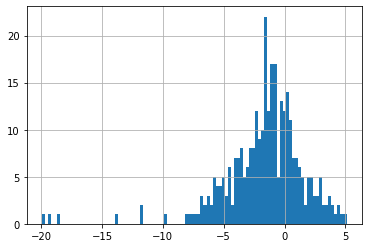

In [9]:
df_gp[df_gp[regras[3]]==1][pct].hist(bins=100)

In [10]:
np.quantile(df_gp['pct_ret'].dropna(),0.05, axis=0)

KeyError: 'pct_ret'

In [ ]:
pct =  'pct_2sem'
cut = df_gp[pct].quantile(0.95)
df_gp[(df_gp[pct]>=cut)].sum()

In [ ]:
df_gp[(df_gp['pct_ret']>cut) & (df_gp['gsrai_lt_down']==1)]['pct_ret'].describe()

In [ ]:
df_gp['2020-01':'2020-18']

In [ ]:
df_gp[(df_gp['pct_ret']>0) & (df_gp['gsrai_lt_down']==1)].index

In [ ]:
df_gp['2019-35':'2019-45']

In [ ]:
df_gp[(df_gp['pct_ret']<0) & (df_gp['gsrai_lt_down']==1)]['pct_ret'].describe()

In [ ]:
df_gp[(df_gp['gsrai_lt_down']==1)]['pct_ret'].describe()

In [ ]:
df_gp[(df_gp['gsrai_lt_down']==1)]['pct_ret_shift'].describe()

In [ ]:
#%%


df_corr= df_gp[df_gp['category']==1].corr()

df_all = df_gp.merge(df, right_on='year_week', left_on='year_week' , how='outer')
[['category','year_week', 'Date_y', 'GSRAII Index_y', 'retorno_y']]
df_all = df_all[df_all['category']==0]

df_all_gp = df_all.groupby('year_week').agg(['std', 'sum', 'min', 'max'])


df_filtrado = df_all[(df_all['year_week']=='2020-12') | (df_all['year_week']=='2020-11')]





#%% Grafico

fig = px.line(df, x="Date", y=['GSRAII Index', 'retorno acumulado'])

# fig = px.line(df_gp, x="Date", y=['GSRAII Index', 'pct_ret'])

fig.add_trace(go.Scatter(
    x=df_gp[df_gp['category']==1]['Date'],
    y=df_gp[df_gp['category']==1]['pct_ret'],
    marker_size=10, mode='markers', name='Queda',
    ))

fig.show()